In [2]:
import os
import pandas as pd

In [26]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 
        'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'review_scores_cleanliness', 
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 
        'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']

key_fields=['host_about','host_response_rate','host_total_listings_count',
            'accommodates','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating','room_type','host_is_superhost','instant_bookable']

df = pd.read_csv('listings.csv',usecols=key_fields)
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)
print(df.shape)

(19896, 12)


### function of calculating the length of text columns.

In [16]:
def calculation(col_list,col_len,df_col,delimiter:'str'):
    col_list
    for i in df_col:
    
        if isinstance(i, str)== False:
            j=str(i)
            col_list.append(j.split(delimiter))
    
        else:
            col_list.append(i.split(delimiter))
    
    col_len
    for k in col_list:
        p=len(k)
        col_len.append(p)      

In [27]:
# for host about
host_about_list=[]
host_about_len=[]

calculation(host_about_list,host_about_len,df.host_about," ")

print(type(host_about_list))
print(host_about_list[0][0])
print(host_about_len[0])
print(host_about_list[0])

<class 'list'>
Hello
18
['Hello', 'I', 'am', 'a', 'Professional', 'designer,', 'a', 'traveler,', 'an', 'entrepreneur.', 'I', 'try', 'always', 'to', 'find', 'a', 'solution.', '']


In [28]:
# for amentities 
amenities_list=[]
amenities_len=[]

calculation(amenities_list,amenities_len,df.amenities,",")

print(type(amenities_list))
print(amenities_list[0][0])
print(amenities_len[0])
print(amenities_list[0])

<class 'list'>
["Kitchen"
13
['["Kitchen"', ' "Essentials"', ' "Cable TV"', ' "Air conditioning"', ' "Washer"', ' "Elevator"', ' "Dryer"', ' "Wifi"', ' "TV"', ' "Heating"', ' "Smoke alarm"', ' "Fire extinguisher"', ' "Carbon monoxide alarm"]']


## details.

In [164]:
"""#convert all the value in host about to lol.
host_about_list=[]
for i in df['host_about']:
    
    if isinstance(i, str)== False:
        j=str(i)
        
        host_about_list.append(j.split(" "))
    
    else:
        
        host_about_list.append(i.split(" "))

#check how it worked
print(type(host_about_list))
print(host_about_list[0][0])

#calculate the length
host_about_len=[]
for i in host_about_list:
    j=len(i)
    host_about_len.append(j)

#check the consistency
print(host_about_len[0])
print(host_about_list[0])"""

### add the new column to the dataframe.

In [29]:
df['host_about'] = host_about_len
df['amenities'] = amenities_len

In [30]:
df.sample(4, random_state=42)[['amenities','host_about']]

,amenities,host_about
9507,31,7
1512,31,30
17433,7,5
8477,13,1


### dummy variables

In [31]:
bools = ['instant_bookable','host_is_superhost']
df[bools]

,instant_bookable,host_is_superhost
0,f,f
1,t,t
2,t,f
3,f,f
4,t,f
...,...,...
19891,f,f
19892,t,f
19893,f,f
19894,f,f


In [32]:
bools = ['instant_bookable','host_is_superhost']
key={'t':1,'f':0}
for b in bools:
    df[b] = df[b].replace(key)
df.sample(3, random_state=42)[bools]

,instant_bookable,host_is_superhost
9507,1,0.0
1512,0,0.0
17433,1,1.0


In [ ]:
### drop nan

In [33]:
df.drop(index=(df[(df.host_about.isna()) | (df.host_response_rate.isna()) 
                  | (df.host_is_superhost.isna())|(df.host_total_listings_count.isna())
                 |(df.room_type.isna())|(df.accommodates.isna())|(df.amenities.isna())
                 |(df.price.isna())|(df.minimum_nights.isna())|(df.number_of_reviews.isna())
                 |(df.instant_bookable.isna())|(df.review_scores_rating.isna())].index), inplace=True)
print(df.shape)

(8874, 12)


### save the dataframe to csv file

In [34]:
df.to_csv('numeric_only.csv',index=False)

### categorical variable

In [35]:
df1 = pd.read_csv('numeric_only.csv')
df1.sample(2,random_state=42)
df1.shape

(8874, 12)

In [36]:
df1.room_type.unique()
map={'Private room':1,'Entire home/apt':2,'Hotel room':3,'Shared room':4}
df1['room_type'] = df1['room_type'].replace(map)
df1.sample(2,random_state=42)

,host_about,host_response_rate,host_is_superhost,host_total_listings_count,room_type,accommodates,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
5825,128,64%,0.0,43.0,2,2,10,36.0,31,1,80.0,0
8170,1,100%,1.0,23.0,2,6,19,254.0,2,1,100.0,1


In [37]:
df1.to_csv('data_analysis_head.csv',index=False)

### delete the header of dataframe

In [60]:
#delete the label/header.

df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0)).reset_index(drop=True)
df1.columns.name = None
df1.sample(2,random_state=42)

,65,100%,1.0,6.0,2,6,34,180.0,3,52,95.0,1
3912,95,100%,1.0,3.0,2,2,37,32.00,31,15,96.0,0
1510,30,100%,0.0,40.0,2,3,31,29.45,30,75,84.0,0


In [12]:
''''df1.drop(index=(df1[(df1.host_about.isna()) | (df1.host_response_rate.isna()) 
                  | (df1.host_is_superhost.isna())|(df1.host_total_listings_count.isna())
                 |(df1.room_type.isna())|(df1.accommodates.isna())|(df1.amenities.isna())
                 |(df1.price.isna())|(df1.minimum_nights.isna())|(df1.number_of_reviews	.isna())
                 |(df1.instant_bookable.isna())].index), inplace=True)
print(df1.shape)''''

(12409, 12)


In [62]:
df1.to_csv('data_analysis.csv',index=False)

### k-mean cluster

In [65]:
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

In [66]:
num_clusters = 2
data_filename = 'clustering_example_data.csv'
output_figure_filename = 'clustering_figure'
output_data_filename = 'complete_data_with_clusters.csv'

data = np.genfromtxt(data_filename,delimiter = ',')

In [67]:
figure_width, figure_height = 7,7
fig_title = 'Figure Title'
x_label   = 'x-axis label'
y_label   = 'y-axis label'
title_fontsize = 15
label_fontsize = 10
x_min, x_max = 0, 30
y_min, y_max = 0, 30

In [68]:
kmeans_output = sklc.KMeans(n_clusters=num_clusters, n_init=1).fit(data)

In [69]:
clustering_ids_kmeans = kmeans_output.labels_

In [70]:
complete_data_with_clusters = np.hstack((data,np.array([clustering_ids_kmeans]).T))
np.savetxt(output_data_filename,complete_data_with_clusters,delimiter=",")

In [71]:
data_by_cluster = []

for i in range(num_clusters):
    
    this_data = []
    
    for row in complete_data_with_clusters:
        
        if row[-1] == i:
            this_data.append(row)
    
    this_data = np.array(this_data)
    
    data_by_cluster.append(this_data)

In [72]:
def setup_figure():
    
    plt.xlim([x_min, x_max])
    plt.ylim([y_min, y_max])
    plt.xlabel(x_label,fontsize=label_fontsize)
    plt.ylabel(y_label,fontsize=label_fontsize)

In [73]:
x_values = data[:,0]
y_values = data[:,1]

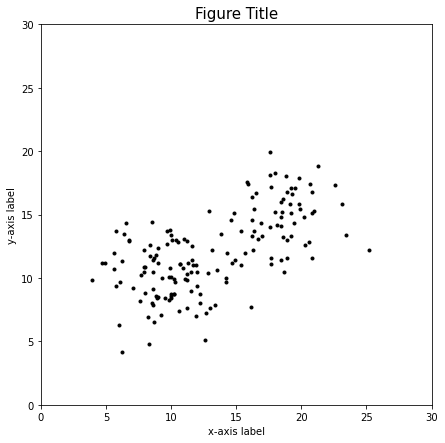

In [74]:
plt.figure(0,figsize=(figure_width,figure_height))
setup_figure()
plt.title(fig_title,fontsize=title_fontsize)
plt.plot(x_values,y_values,'k.')
plt.savefig(output_figure_filename + '_unclustered_data.png')

In [75]:
color_list = ['b','r','g','m','c','k','y']

In [ ]:
'''for i in range(num_clusters):
    
    plt.figure(i+1,figsize=(figure_width,figure_height))
    setup_figure()
    plt.title(fig_title + ' - Cluster ' + str(i),fontsize=title_fontsize)
    
    x_values = data_by_cluster[i][:,0]
    y_values = data_by_cluster[i][:,1]
    
    plt.plot(x_values,y_values,color_list[i % num_clusters] + '.')
    plt.savefig(output_figure_filename + '_cluster_' + str(i) + '.png')
'''

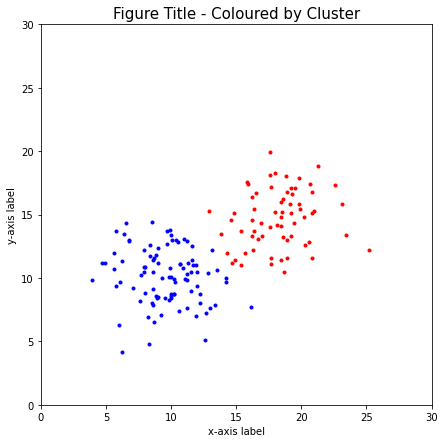

In [77]:
plt.figure(num_clusters + 1,figsize=(figure_width,figure_height))
setup_figure()
plt.title(fig_title + ' - Coloured by Cluster',fontsize=title_fontsize)

for i in range(num_clusters):
    
    x_values = data_by_cluster[i][:,0]
    y_values = data_by_cluster[i][:,1]
    
    plt.plot(x_values,y_values,color_list[i % num_clusters] + '.')
      
plt.savefig(output_figure_filename + '.png')

In [78]:
# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(data,clustering_ids_kmeans)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)


Silhouette Score: 0.5823744483946874


### correlation matrix

In [63]:
# This program creates a correlation matrix from data stored in a csv file.
# It then saves the correlation matrix as a csv file.

# The data file must be in columns of numbers - no column labels, etc.
# Each column is a data series, X0, X1, X2, etc.

# This data must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file demo_multreg_data_example.csv for reference.

# In the next line, replace demo_multreg_data_example.csv with the filename of your data:
data_filename = 'data_analysis.csv'

# In the next line, replace correlation_matrix with the filename you wish to save as:
output_filename = 'correlation_matrix.csv'

# The next lines import the necessary package to create the correlation analysis:
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy it in as follows:
# e.g. data = [[737.4776314, 34, 65],
#              [869.2063792, 57, 73],
#              [1033.705248, 59, 100],
#              ...
#              [737.5129466, 66, 49]]
# (Compare this example with the file demo_multreg_data_example.csv)

# These lines create the correlation matrix and print it:
correlation_matrix = np.corrcoef(data.T)
print(correlation_matrix)

# correlation_matrix[i,j] is the correlation between the series Xi and Xj.

# The next line saves the correlation matrix as a csv file:
#np.savetxt(output_filename,correlation_matrix,delimiter=',')

[[ 1.00000000e+00             nan             nan             nan
   2.57610568e-01  2.43206112e-01  1.94291773e-01  7.17487894e-02
  -1.97863803e-02  1.28598706e-01             nan  3.08321544e-02]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [            nan             nan             nan             nan
              nan             nan             nan             nan
              nan             nan             nan             nan]
 [ 2.57610568e-01             nan             nan             nan
   1.00000000e+00  5.00628955e-01  2.38596602e-01  1.54978816e-01
   8.14923007e-02  4.81563926e-02             nan  1.02187814e-01]
 [ 2.

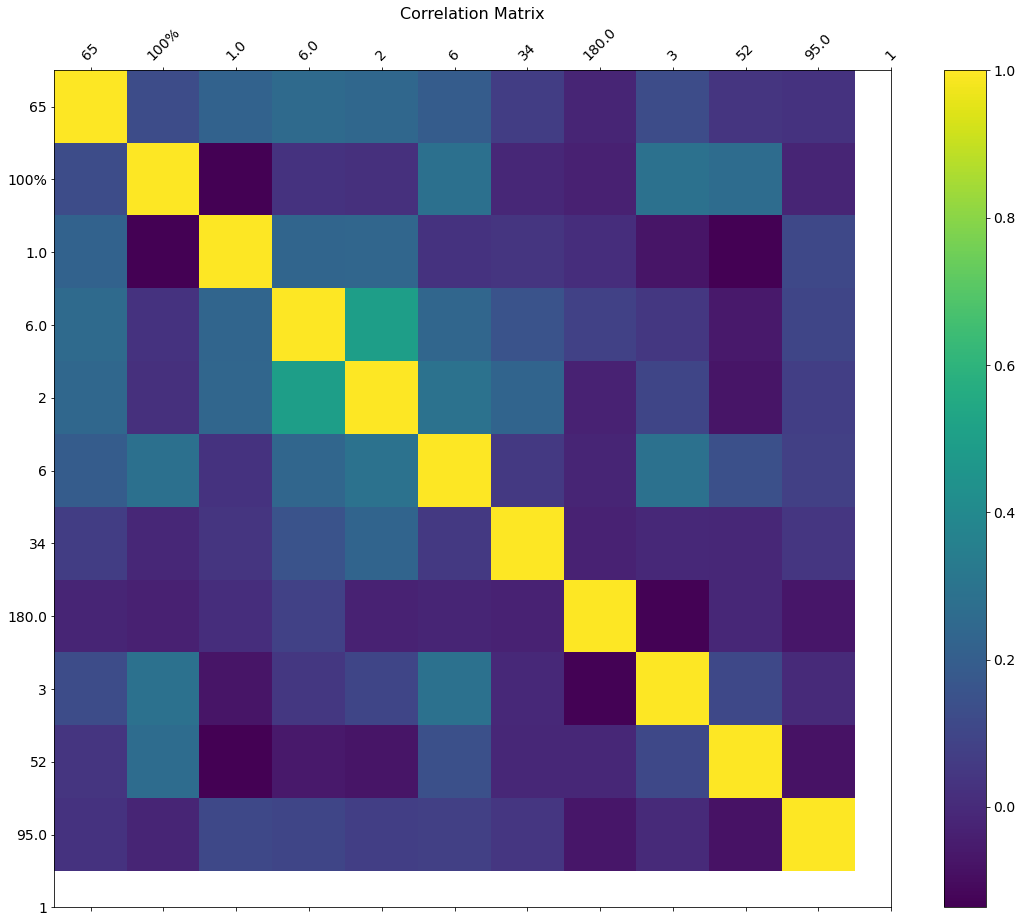

In [61]:
import matplotlib.pyplot as plt

#plt.matshow(dataframe.corr())
#plt.show()

f = plt.figure(figsize=(19, 15))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45)
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);